In [1]:
from matplotlib import pyplot as plt
import ffmpeg
import numpy as np
from io import BytesIO
from PIL import Image
import os
import cv2

In [2]:
wf = "J:/Onur Serce/Preprocessed videos/Day1/to_be_overlaid/"
os.chdir(wf)
videos = [v for v in os.listdir(wf) if v.endswith('.mp4')]
print(videos)

['ChR2_1_Day1.mp4', 'ChR3_Day1.mp4', 'Ctrl1_Day1.mp4', 'Ctrl2_1_Day1.mp4', 'Ctrl2_2_Day1.mp4', 'Ctrl3_Day1.mp4', 'Ctrl4_Day1.mp4', 'HR1_Day1.mp4', 'HR2_Day1.mp4', 'HR3_Day1.mp4']


In [10]:
def png_to_np(png_bytes):
    buffer = BytesIO(png_bytes)
    pil_image = Image.open(buffer)
    return np.array(pil_image)

def grab_frame(video, frame_number=1):
    frame, err = (
    ffmpeg
    .input(video)
    .filter('select', 'gte(n,{})'.format(frame_number))
    .output('pipe:', vframes=1, format='image2', vcodec='mjpeg')
    .run(capture_stdout=True)
    )
    return png_to_np(frame), err

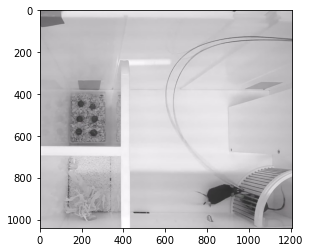

In [11]:
frame = grab_frame(videos[0])[0]
plt.imshow(frame)

In [5]:
roi = cv2.selectROI("SelectROI", frame)
cv2.destroyWindow("SelectROI")

In [6]:
roi

(949, 796, 259, 244)

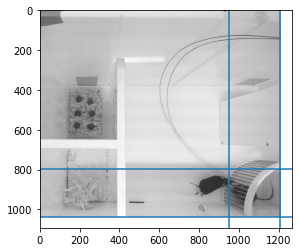

In [17]:
plt.imshow(frame)
plt.axvline(roi[0])
plt.axvline(roi[0]+roi[2])
plt.axhline(roi[1])
plt.axhline(roi[1]+roi[3])

In [20]:
img = frame.copy()
mask = np.zeros(img.shape, dtype=np.uint8)